#CNN on CIFAR-10



CIFAR-10 dataset contains 32x32 color images from 10 classes: __airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck__:
<img src="https://github.com/hse-aml/intro-to-dl/blob/master/week3/images/cifar10.jpg?raw=1" style="width:80%">

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras

In [2]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print("Train samples:", x_train.shape, y_train.shape)
print("Test samples:", x_test.shape, y_test.shape)
NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                                     "dog", "frog", "horse", "ship", "truck"]

x_mean = np.mean(x_train, axis=(0, 1,2),keepdims=True)
x_std = np.std(x_train, axis=(0, 1,2),keepdims=True)
x_train_norm = (x_train - x_mean) / x_std
x_test_norm = (x_test - x_mean) / x_std
y_train_onehot = pd.get_dummies(y_train.squeeze()).values
y_test_onehot = pd.get_dummies(y_test.squeeze()).values

Train samples: (50000, 32, 32, 3) (50000, 1)
Test samples: (10000, 32, 32, 3) (10000, 1)


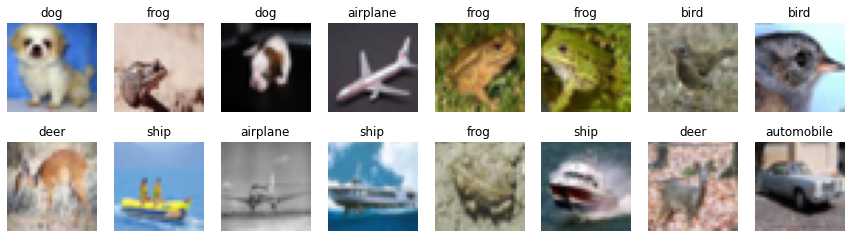

In [3]:
# show random images from train
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
        for j in range(rows):
                random_index = np.random.randint(0, len(y_train))
                ax = fig.add_subplot(rows, cols, i * rows + j + 1)
                ax.grid('off')
                ax.axis('off')
                ax.imshow(x_train[random_index, :])
                ax.set_title(cifar10_classes[y_train[random_index, 0]])
plt.show()

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:

from functools import partial
tfph = tf.compat.v1.placeholder
tf.compat.v1.disable_eager_execution()
from modeling import BaseConv, StridedConv, ResidualConv, Model
BC, SC, RC = BaseConv, StridedConv, ResidualConv

layers = [BC(32), RC([16, 32]), RC([16, 32]), SC(64), RC([32, 64]), RC([32, 64]), SC(128), RC([64, 128]), RC([64, 128])] # .70
layers = [SC(8), RC([4, 8]), SC(16), RC([8, 16])]

batch_size = 64 # .71

In [6]:
mdl = Model(x_test_norm=x_test_norm,x_train_norm = x_train_norm,
            y_test_onehot=y_test_onehot,y_train_onehot = y_train_onehot,
           layers=layers, y_test = y_test)
mdl.train(batch_size = batch_size, steps = 300)

C:\workspace\Teaching\cifar_10\modeling.py:38: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  return self.layer(signal)
C:\Users\10838233\Anaconda3\envs\tf2\lib\site-packages\keras\legacy_tf_layers\convolutional.py:575: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)
C:\workspace\Teaching\cifar_10\modeling.py:25: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  x = layer(x)
C:\workspace\Teaching\cifar_10\modeling.py:82: UserWarning: `tf.layers.flatten` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Flatten` instead.
  pivot_feautres = tf.compat.v1.layers.flatten(pivot_feautres)
C:\Users\10838233\Anaconda3\envs\tf2\lib\site-packages\keras\legacy_tf_layers\core.py:541: UserWarni

2.8654397
2.5022693
2.35469


In [7]:
np.mean(mdl.losses[-10:]), np.min(mdl.val_losses)

(2.341032, 2.35469)

In [8]:
# (0.068675384, 0.9072602)

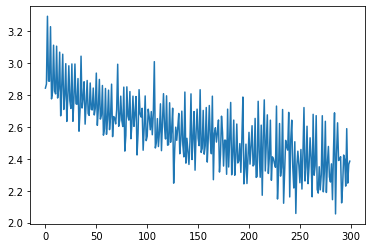

In [9]:
plt.plot(mdl.losses)

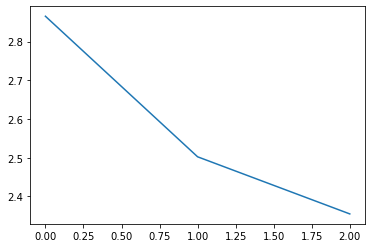

In [10]:
plt.plot(mdl.val_losses)

In [11]:

mdl.val_acc

[0.1, 0.2634, 0.3013]

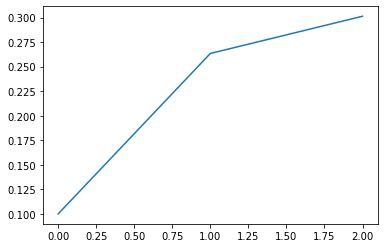

In [12]:
plt.plot(mdl.val_acc)

In [13]:
# validate model